In [55]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data, color, io
import IPython

import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [56]:
import imageio as io

In [57]:
# Load an RGB image of your choice from a URL

In [58]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

<ipython-input-59-b1cc0447b322>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("https://th.bing.com/th/id/OIP.HLuY60jzx5puuKjbqmWRRwHaEK?pid=ImgDet&rs=1")


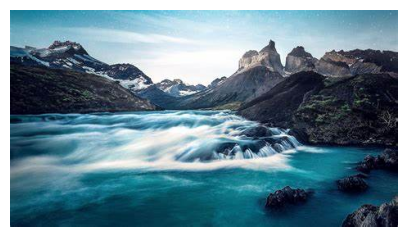

In [59]:
image = io.imread("https://th.bing.com/th/id/OIP.HLuY60jzx5puuKjbqmWRRwHaEK?pid=ImgDet&rs=1")

plot(image)

In [60]:
#Resize the image to 224x224

#(it didn't show the image with np.resize, so I used cv2)

In [61]:
import cv2

# Load the input image
input_image = cv2.imread('input_image.jpg')

# Specify the new size (width, height)
new_size = (224, 224)

# Resize the image
resized_image = cv2.resize(image, new_size)

# Save the resized image
cv2.imwrite('output_image.jpg', resized_image)


True

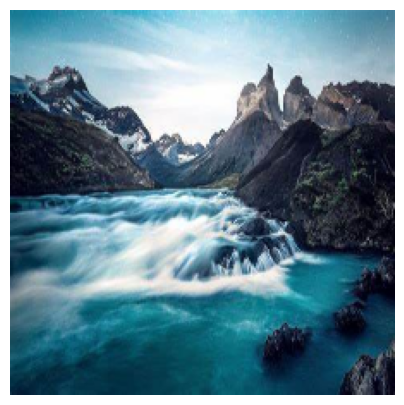

In [62]:
plot(resized_image)

In [ ]:
#Show a grayscale copy

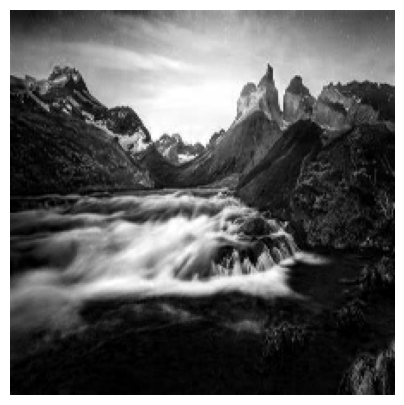

In [63]:
image = resized_image
image = image[:,:,0]
image = image.astype(float)
image /= 255.0
plot(image)

In [84]:
#Convolve with 10 random filters and show filters and features maps for each


In [64]:
a = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])

In [65]:
f=a

In [66]:
x=image

In [67]:
f

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

In [68]:
f[2,2]

-1

In [69]:
x2 = np.zeros(x.shape)

In [70]:
for i in range(1,x.shape[0]-1):
    for j in range(1,x.shape[1]-1):

        x2[i,j] = f[0,0] * x[i-1,j-1]  \
        +         f[0,1] * x[i-1,j]    \
        +         f[0,2] * x[i-1,j+1]  \
        +         f[1,0] * x[i,j-1]    \
        +         f[1,1] * x[i,j]      \
        +         f[1,2] * x[i,j+1]    \
        +         f[2,0] * x[i+1,j-1]  \
        +         f[2,1] * x[i+1,j]    \
        +         f[2,2] * x[i+1,j+1]

In [71]:
def conv2(x,f):
    x2 = np.zeros(x.shape)
    for i in range(1,x.shape[0]-1):
        for j in range(1,x.shape[1]-1):

            x2[i,j] = f[0,0] * x[i-1,j-1] \
            +         f[0,1] * x[i-1,j] \
            +         f[0,2] * x[i-1,j+1] \
            +         f[1,0] * x[i,j-1] \
            +         f[1,1] * x[i,j] \
            +         f[1,2] * x[i,j+1] \
            +         f[2,0] * x[i+1,j-1] \
            +         f[2,1] * x[i+1,j] \
            +         f[2,2] * x[i+1,j+1]

    return x2

In [72]:
a=np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# a=np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])
# a=np.matrix([[1,1,1],[1,1,1],[1,1,1]])
# a=5*np.random.random((3,3))-5*np.random.random((3,3))

In [73]:
a

matrix([[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]])

In [74]:
z = conv2(x,a)

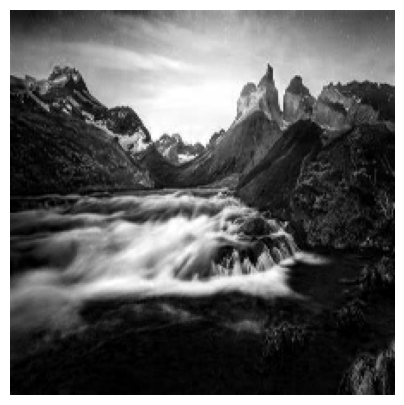

In [75]:
plot(x)

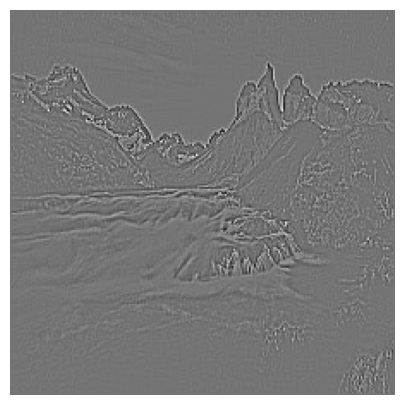

In [76]:
plot(z)

In [77]:
x

array([[0.07843137, 0.13333333, 0.0745098 , ..., 0.28235294, 0.27058824,
        0.29019608],
       [0.08627451, 0.11764706, 0.08235294, ..., 0.27843137, 0.26666667,
        0.28627451],
       [0.09803922, 0.10196078, 0.09411765, ..., 0.2745098 , 0.27058824,
        0.28235294],
       ...,
       [0.01176471, 0.01960784, 0.01960784, ..., 0.03921569, 0.02352941,
        0.02745098],
       [0.0627451 , 0.01568627, 0.02745098, ..., 0.03921569, 0.01568627,
        0.08235294],
       [0.08627451, 0.01568627, 0.03529412, ..., 0.03529412, 0.01568627,
        0.10980392]])

In [78]:
np.random.random((3,3))

array([[0.74708928, 0.36279514, 0.21578929],
       [0.54880835, 0.9335039 , 0.84364374],
       [0.10570364, 0.65903667, 0.0919216 ]])

In [79]:
a = 2*np.random.random((3,3))-1

In [80]:
a

array([[0.32211199, 0.33691299, 0.56542045],
       [0.47994888, 0.12941559, 0.5028739 ],
       [0.38562188, 0.0318636 , 0.22922485]])

In [81]:
a = np.random.random((3,3))

In [82]:
a

array([[0.50042489, 0.13884629, 0.28740771],
       [0.82379704, 0.44547204, 0.87621408],
       [0.04331741, 0.20402773, 0.55030704]])

[[-0.62214438  0.14332161 -0.37135601]
 [ 0.7156545   0.45274811  0.20482945]
 [-0.35272127  0.9564355   0.90886596]]


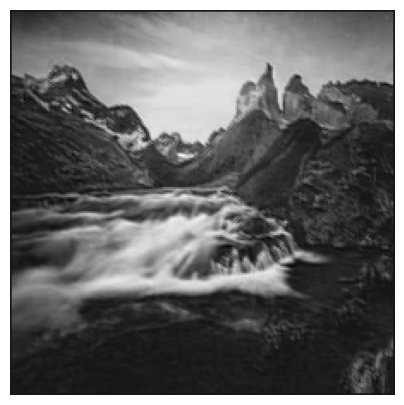

[[ 0.35931008 -0.19097563 -0.90348441]
 [-0.44338744  0.98992862 -0.70640221]
 [-0.14230934 -0.66762903 -0.11521326]]


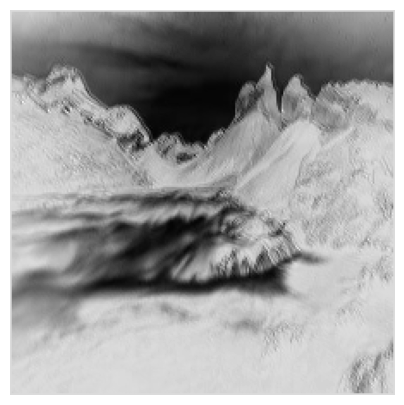

[[-0.28076527 -0.04851227 -0.32910813]
 [-0.32322993 -0.74738141  0.19831307]
 [ 0.11783732  0.08531969 -0.46126318]]


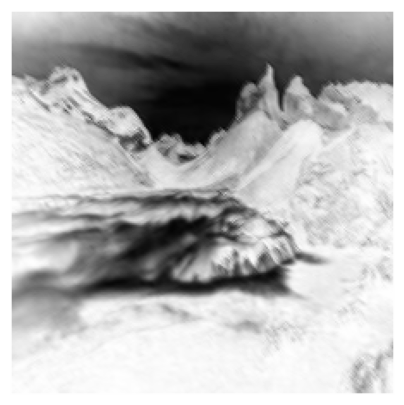

[[ 0.27834454  0.22685449 -0.46005244]
 [-0.56942141 -0.43556832  0.63940813]
 [-0.8926259   0.89901642 -0.13390085]]


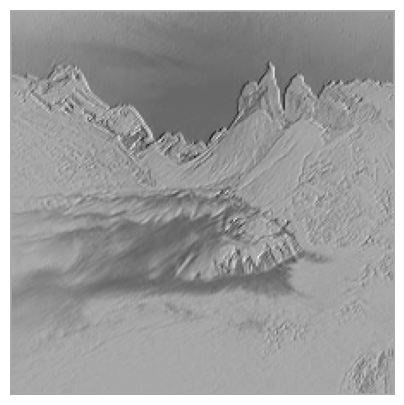

[[-0.87277761  0.38723251  0.709733  ]
 [-0.23601991  0.94910712  0.1725275 ]
 [ 0.88270326 -0.79626824  0.76860214]]


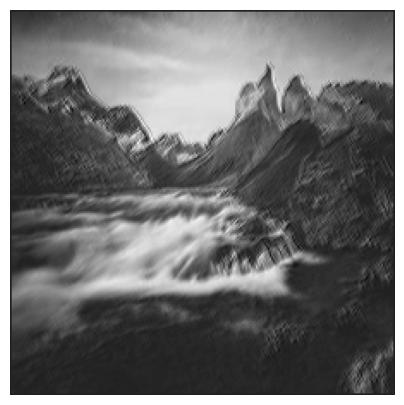

[[ 0.38683981 -0.85327254  0.34376387]
 [ 0.35699403  0.0443232   0.78608636]
 [-0.18316119  0.28051577  0.16616668]]


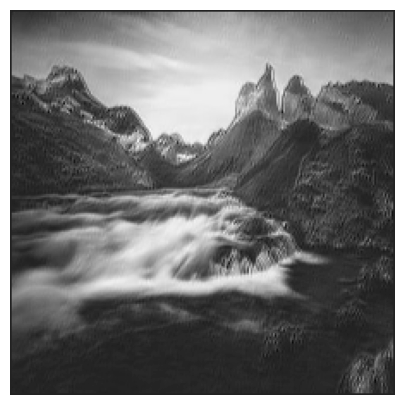

[[-0.48004698 -0.07231621  0.22962667]
 [ 0.77333627  0.11628783 -0.59008827]
 [-0.67836124 -0.04216397  0.5597343 ]]


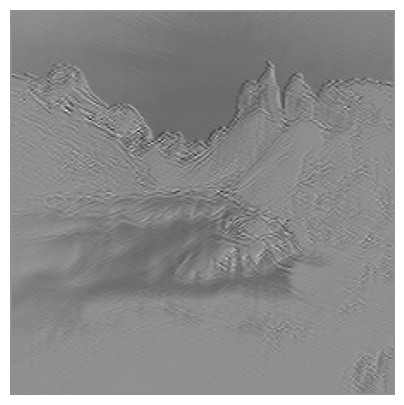

[[ 0.94110571  0.34319431  0.68833865]
 [ 0.527374    0.07655161 -0.84276389]
 [ 0.63244008  0.05614684 -0.01809384]]


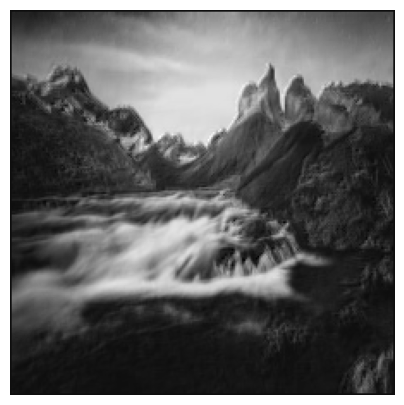

[[-0.18106484  0.76775402 -0.22353513]
 [-0.19255832 -0.33396977 -0.14054616]
 [-0.78961919 -0.50267045  0.5740281 ]]


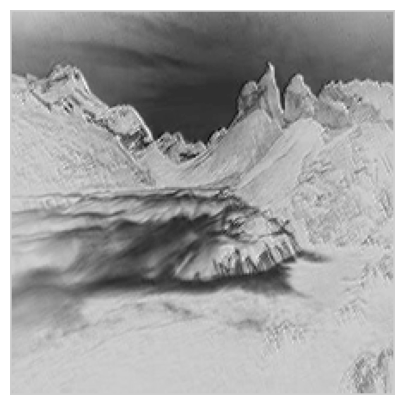

[[-0.11006713 -0.22491499 -0.54755642]
 [ 0.90827678 -0.37109428  0.83886417]
 [-0.82997037 -0.07914003 -0.08422798]]


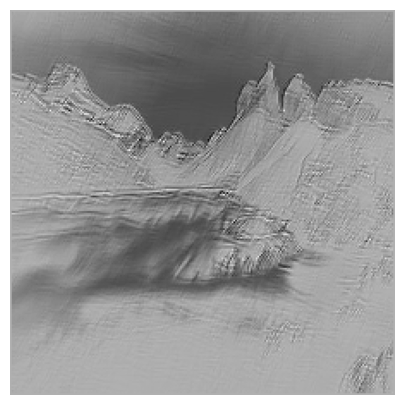

In [85]:
for i in range(10):
    a = 2*np.random.random((3,3))-1
    print(a)
    z=conv2(x,a)
    plot(z)